In [1]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# generate random sample
N = 100
df = pd.DataFrame({
    "x1": np.random.uniform(0, 1, N),
    "x2": np.random.uniform(0, 1, N),
})

df = df.loc[np.absolute(df.x1 - df.x2) > 0.1]
y = (df.x1-df.x2 > 0) * 2 - 1

In [32]:
def plot_results(df, y, scv=None, show_supp=False):
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.scatter(df.loc[y>0, 'x1'], df.loc[y>0, 'x2'], marker="+", c='green')
    plt.scatter(df.loc[y<0, 'x1'], df.loc[y<0, 'x2'], marker="x", c='red')
    
    if scv:
        intercept = scv.intercept_[0] / scv.coef_[0][1]
        slope = - scv.coef_[0][0] / scv.coef_[0][1]
        x = np.linspace(-0.05, 1.05, 1000)
        y = slope * x + intercept
        plt.plot(x, y)
        
        if show_supp:
            sv_x = scv.support_vectors_[:,0]
            sv_y = scv.support_vectors_[:,1]
            plt.scatter(sv_x, sv_y, s=80, facecolors='none', edgecolors='#000')
    
    plt.show()

In [4]:
class robust_svm:
    def __init__(self, scv, eta=1.0, max_iters=50):
        self.eta = eta
        self.scv = scv
        self.max_iters = max_iters


    def fit(self, X, y):
        beta = 1. / (1 - np.exp(- self.eta))

        z = np.zeros(len(y))
        v = - np.exp(- self.eta * np.maximum(0, 1 - z))
        Cv = - beta * self.eta * v # cost implicit in scv

        for i in range(self.max_iters):
            self.scv.fit(X, y, Cv)

            z = self.predict(X) * y
            v = - np.exp(-self.eta * np.maximum(0, 1 - z))
            #print(np.linalg.norm(Cv + beta * self.eta * v))
            Cv = - beta * self.eta * v # cost implicit in scv
            ########## debug
            #gv = -v * np.log(-v) + v;
            #w = self.scv.coef_[0]
            #print(-0.5*np.linalg.norm(w)**2 + 10*beta*np.sum(self.eta*v*np.maximum(0,1-z) - gv))


    def predict(self, X):
        return self.scv.decision_function(X)

## No outliers

In [5]:
rsvm = robust_svm(SVC(kernel='linear', C=10.), eta=1.)
rsvm.fit(df, y)

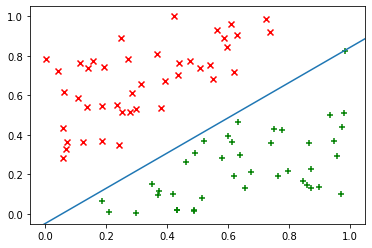

In [6]:
plot_results(df, y, rsvm.scv)

In [7]:
svm  = SVC(kernel='linear', C=10.)
svm.fit(df, y)

SVC(C=10.0, kernel='linear')

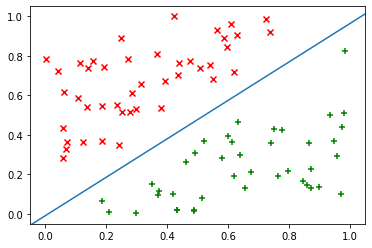

In [8]:
plot_results(df, y, svm)

## Outliers
First add gross outlier

In [9]:
df_outliers = df.append(pd.DataFrame({"x1": [-9], "x2": [9]}, index=[N+1]))
y_outliers=np.append(y, [1])

In [10]:
rsvm = robust_svm(SVC(kernel='linear', C=10.), eta=1.)
rsvm.fit(df_outliers, y_outliers)

[ 0.55175676  0.38045992  0.24195891  0.61884865  0.98456853  0.63165754
  0.52135254  0.18692327 -9.        ]


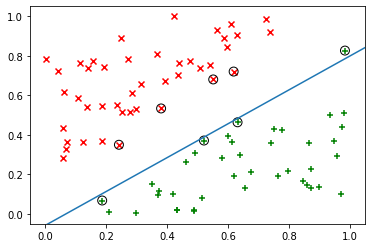

In [30]:
`

In [12]:
svm  = SVC(kernel='linear', C=10.)
svm.fit(df_outliers, y_outliers)

SVC(C=10.0, kernel='linear')

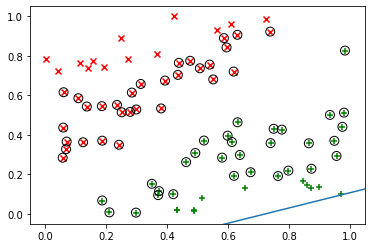

In [33]:
plot_results(df, y, svm, show_supp=True)

In [20]:
svm.support_vectors_[0,:]

array([0.13645546, 0.54325521])